# Mini Project Machine Learning 

### Maxwell A. Fine 

### 14880725

### Introduction

Galaxy evolution is a fundamental field of study within astronomy, offering insights into the past, present, and future of not only our own galaxy but also the billions (and billions) of other galaxies populating the cosmos. The quest to unravel the life cycles of galaxies has led to the development of various theories and models, each attempting to explain the intricate processes that shape galaxies over time. While the Hertzsprung-Russell (HR) diagram provides a detailed framework for understanding stellar evolution, the diversity and complexity of galaxies have made it challenging to establish a similarly clear-cut evolutionary track for Galaxies.

Nevertheless, astronomers have identified several key stages and types of galaxies, from the early protogalactic clouds of the young Universe to the majestic spiral and elliptical galaxies we observe today. Through the study of galaxy morphology, kinematics, and stellar populations, as well as the role of interactions and mergers, we are beginning to piece together the vast puzzle of galactic life cycles. Moreover, cutting-edge tools like spectroscopy, radio astronomy, and deep-field imaging are allowing us to peer deeper into the distant Universe, revealing the conditions and processes that lead to the formation and transformation of galaxies.


We do have a "Tuning Fork" diagram to aid in classification of Galaxies, the below figure demenstrates the main categories. The main features include Bar no bar, spiral vs no spiral, for our purposes we consider 37 categories. (Which is more then there are in the displayed tunning fork Diagram)

<p align="center">
  <img src="https://www.e-education.psu.edu/astro801/sites/www.e-education.psu.edu.astro801/files/image/hubblesite_tuning_fork.jpg" alt="Hubble's Tuning Fork"/>
</p>


The purpose of this notebook is to evaluate the accuracy of a Machine Learning approach to galaxy classification. Identifying galaxy types manually is time-consuming and limits the time astronomers can spend on understanding galaxy evolution. Hopefully future astronomers will be able to look at the categorized galaxies (and redshift information!) and come up with a theory of galaxy evolution. 

Astronomy is looking up!

### Data Description

The data we used for the mini project comes from [Galaxy Zoo - The Galaxy Challenge](https://www.kaggle.com/competitions/galaxy-zoo-the-galaxy-challenge), which is hosted on Kaggle.  

For more information on the project, see [Galaxy Zoo the project page](https://data.galaxyzoo.org/). It is not clear which version of Galaxy zoo data is on kaggle, hence it is not clear what processing steps where taken by Galaxy zoo for our data set. Note that the current full data set is 900,000 images while, the kaggle set is 70,000. (The kaggle version is almost 10 years old)

I am using the .csv file, and I am combining the test, and train image directories into a single directory for convinance (does this count as pre-proccesing?)

The images are are 3 color (RBG) and 424x424 pixels. The 'correct' classes were identified by volunteers! This means that the True class is unknown but we have a prior distrubution of classes, IE instead of 1 and 36 zeros, it is some discreete prob distrubution that adds up to 1. The data looks 'bad' in that there are close by stars in them, and sometimes more then one galaxy, and sometimes the galaxy is blury making human and even expert classification hard. 

Based on the Kaggel comments, and code a score of 75% accuracy is the cutting egde leadership board. 


Kaggle Data Description:

images_training: JPG images of 61578 galaxies. Files are named according to their GalaxyId.

solutions_training: Probability distributions for the classifications for each of the training images.

images_test: JPG images of 79975 galaxies. Files are name according to their GalaxyId. You will provide probabilities for each of these images. 

all_ones_benchmark: Sample submission file corresponding to the All Ones Benchmark

all_zeros_benchmark: Sample submission file corresponding to the All Zeros Benchmark

central_pixel_benchmark: Simple benchmark that clusters training galaxies according to the color in the center of the image and then assigns the associated probability values to like-colored images in the test set.

The first column in each solution is labeled GalaxyID; this is a randomly-generated ID that only allows you to match the probability distributions with the images. The next 37 columns are all floating point numbers between 0 and 1 inclusive. These represent the morphology (or shape) of the galaxy in 37 different categories as identified by crowdsourced volunteer classifications as part of the Galaxy Zoo 2 project. T

These morphologies are related to probabilities for each category; a high number (close to 1) indicates that many users identified this morphology category for the galaxy with a high level of confidence. Low numbers for a category (close to 0) indicate the feature is likely not present. 







### Methods:

The images are are 3 color (RBG) and 424x424 pixels. The 'correct' classes were identified by volunteers! This means that the True class is unknown but we have a prior distrubution of classes, IE instead of 1 and 36 zeros, it is some discreete prob distrubution that adds up to 1. The data looks 'bad' in that there are close by stars in them, and sometimes more then one galaxy, and sometimes the galaxy is blury making human and even expert classification hard. 

Based on the Kaggel comments, and code a score of 75% accurate is the cutting egde leadership board, but I'm not sure if I am reading that correclty or how to find more accurate information on this number. 


Idea / model outline : 

* use a CNN with Pytorch to classify the Galaxies 
    - will modify the CNN from class for the MINST data set
        - this was for 10 classes, and smaller / nicer looking data so I will make the model have more params / layers to handle larger input images, lower data qualilty, and more classes
    - 3 con layers, 3, max pooling layers 3 fully connected layers 
        - This sounds good? I am training this on my laptop so not enough time to test other model configs or param space.
        - I am worried about the max pooling with nearby bright stars, maybe better to do 2 layer?  Having one should make the model more robust to handle some nearby stars as well
        - 3 convolutional layers are to extract shape of data similar to MINST, I am using 20 as the output
    - loss function is the cross entropy loss as we are doing classification
    - adam desent, because I think it works better then stochiat gradient. 
    - not sure how to calculate the full posterior, the example we learned in class was for a regression problem not a classification problem
    - I am just guessing on what adequate hyperparemeters are, if I had more compute time maybe I could make a more computational efficient model by testing varius hyperparameters
    - Training using 'normal' training loop 
    - edit from after results, perhaps I should have the output channels from the conv be larger or equal to the number of classes IE 37>=, I think this would have enalbed the modle to pick up on more features, and I could add another max pooling to make it computationaly cheaper to train


Model Outline:

Here is a handwavy version of the model outline, you can go scroll and see the full thing, I am skipping some Relu actication functions 

* input images = 3x200x200
* conv1
* max pool
* conv2
* max pool
* conv3
* fc1
* fc2
* fc3
* soft max normalization 


Preproccesing:
* split data into test, and training sets 
* In order to use pytorch in a manner most similar to the example homeworks, we want a pytorch `DataLouder` object / function call.
    - Assign an image as the data, and the full 37 class values as the class values (not just the highest prob set as the correct one!!)
    - I will be using CHAT GPT to assit in the data pre-processing step 
* I am resizing the input images to be 200x200 so the model is faster to train

Testing:
*  not sure how to calculate the full posterior, the example we learned in class was for a regression problem not a classification problem
* We want the model to output not only the same most probable class, but also have a similar prob distrubution of the classes (This is already achieved with the cross entropy loss which comes from the KL divergence)
* Our test makes the most sense to compare the most probable class from the human 'correct' values, to the model predicted values. But can also print out the average KL-divergence
* plot of example images, with KL divergence comparision 






### Code Structure 

* Import and paramter cell
* load csv file as df, split into training and test
* display df, plot a few test images
* data preprocessing 
* Pytorch 1: define model 
* Pytorch 2: define training loop
* Pytorch 3: train model

### Imports 

In [86]:
# imports
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
from sklearn.model_selection import train_test_split # to split data easily into train and test sets
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Compose, Resize, ToTensor
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import multiprocessing # I am running this on my laptop so, I am setting it use all-2 of my cores



# hyper parameters, and other variables set here
random_state = 42 # random seed
test_size = 0.10 # fraction to use for testing size 
image_dir = 'images' 
training_data = 'training_solutions_rev1.csv'
num_epochs = 10 # Number of epochs to train the model
lr = 0.001  # learning rate
batch_size = 64
num_classes = 37  # Number of classification labels
model_path = 'final_model_v2_trained_20_epochs.pth' # file to save / load trained model parameters 

In [51]:
# read in data with solutions 
df = pd.read_csv(training_data)

print("Number of columns:", df.shape[1])

# split into training and test data 
df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state) 

# Verify the size of the train and test sets
print('Orginal Size ',df.shape, '\nTrain Size ',df_train.shape, '\nTest Size ', df_test.shape)

# Create a dictionary that maps column names (classes) to indices, excluding 'GalaxyID'
# this is important and part of the pre-processing step! the final classes are mapped back into the labels with this
label_to_index = {col: idx for idx, col in enumerate(df.columns[1:])}
print(label_to_index)

# Reverse the dictionary to create class_names, mapping indices to class names
class_names = {idx: col for col, idx in label_to_index.items()}
print(class_names)

Number of columns: 38
Orginal Size  (61578, 38) 
Train Size  (55420, 38) 
Test Size  (6158, 38)
{'Class1.1': 0, 'Class1.2': 1, 'Class1.3': 2, 'Class2.1': 3, 'Class2.2': 4, 'Class3.1': 5, 'Class3.2': 6, 'Class4.1': 7, 'Class4.2': 8, 'Class5.1': 9, 'Class5.2': 10, 'Class5.3': 11, 'Class5.4': 12, 'Class6.1': 13, 'Class6.2': 14, 'Class7.1': 15, 'Class7.2': 16, 'Class7.3': 17, 'Class8.1': 18, 'Class8.2': 19, 'Class8.3': 20, 'Class8.4': 21, 'Class8.5': 22, 'Class8.6': 23, 'Class8.7': 24, 'Class9.1': 25, 'Class9.2': 26, 'Class9.3': 27, 'Class10.1': 28, 'Class10.2': 29, 'Class10.3': 30, 'Class11.1': 31, 'Class11.2': 32, 'Class11.3': 33, 'Class11.4': 34, 'Class11.5': 35, 'Class11.6': 36}
{0: 'Class1.1', 1: 'Class1.2', 2: 'Class1.3', 3: 'Class2.1', 4: 'Class2.2', 5: 'Class3.1', 6: 'Class3.2', 7: 'Class4.1', 8: 'Class4.2', 9: 'Class5.1', 10: 'Class5.2', 11: 'Class5.3', 12: 'Class5.4', 13: 'Class6.1', 14: 'Class6.2', 15: 'Class7.1', 16: 'Class7.2', 17: 'Class7.3', 18: 'Class8.1', 19: 'Class8.2', 2

### inspect training Dataframe and example galaxy images
show some example images with their correct categories for demonstration purposes

In [52]:
df_train

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
60465,984155,0.958719,0.000000,0.041281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
60819,988605,0.375008,0.624694,0.000298,0.000000,0.624694,0.000000,0.624694,0.000000,0.624694,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
6916,202139,0.309846,0.675275,0.014879,0.033460,0.641815,0.000000,0.641815,0.294636,0.347179,...,0.0,0.202209,0.000000,0.092427,0.294636,0.000000,0.000000,0.00000,0.000000,0.000000
49308,817994,0.404158,0.545320,0.050522,0.000000,0.545320,0.000000,0.545320,0.377562,0.167758,...,0.0,0.125854,0.125854,0.125854,0.377562,0.000000,0.000000,0.00000,0.000000,0.000000
42636,722267,0.205834,0.769575,0.024592,0.000000,0.769575,0.000000,0.769575,0.594924,0.174651,...,0.0,0.349216,0.179901,0.065806,0.107595,0.129473,0.059479,0.04656,0.037398,0.214419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,893172,0.831716,0.081176,0.087108,0.000000,0.081176,0.052624,0.028552,0.000000,0.081176,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
38158,657038,0.209927,0.789672,0.000401,0.000000,0.789672,0.000000,0.789672,0.716147,0.073525,...,0.0,0.502185,0.213962,0.000000,0.092198,0.277439,0.000000,0.00000,0.000000,0.346510
860,112843,0.457719,0.525546,0.016735,0.000000,0.525546,0.000000,0.525546,0.210060,0.315486,...,0.0,0.210060,0.000000,0.000000,0.000000,0.095836,0.000000,0.00000,0.000000,0.114224
15795,333500,0.343315,0.637737,0.018948,0.036959,0.600778,0.313792,0.286986,0.093276,0.507502,...,0.0,0.027167,0.066109,0.000000,0.000000,0.039908,0.000000,0.00000,0.000000,0.053368


In [3]:
df_train.describe()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
count,55420.000000,55420.000000,55420.000000,55420.000000,55420.000000,55420.000000,55420.000000,55420.000000,55420.000000,55420.000000,...,55420.000000,55420.000000,55420.000000,55420.000000,55420.000000,55420.000000,55420.000000,55420.000000,55420.000000,55420.000000
mean,550183.475045,0.433158,0.541604,0.025238,0.106226,0.435378,0.102434,0.332944,0.215238,0.220141,...,0.032694,0.091724,0.083818,0.039696,0.015387,0.094112,0.017609,0.007612,0.006951,0.073567
std,258553.242617,0.283610,0.296565,0.037983,0.212401,0.302026,0.177409,0.247774,0.285309,0.179789,...,0.097970,0.144982,0.139975,0.099053,0.052177,0.193504,0.067868,0.037764,0.037129,0.107205
min,100008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328605.250000,0.175880,0.279230,0.000000,0.000000,0.167815,0.000000,0.122315,0.000000,0.072590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,551671.000000,0.417990,0.557562,0.014892,0.000000,0.393349,0.000000,0.288499,0.092071,0.183510,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,773092.250000,0.680464,0.811246,0.034368,0.085172,0.695207,0.134237,0.515775,0.330244,0.338764,...,0.000000,0.147270,0.126405,0.030581,0.000000,0.098406,0.000000,0.000000,0.000000,0.128823
max,999967.000000,1.000000,1.000000,0.935147,1.000000,1.000000,1.000000,1.000000,1.000000,0.957937,...,0.901991,0.949733,0.877393,0.992223,0.886363,1.000000,0.975913,0.957000,0.938881,0.753082


Image size is
(424, 424, 3)


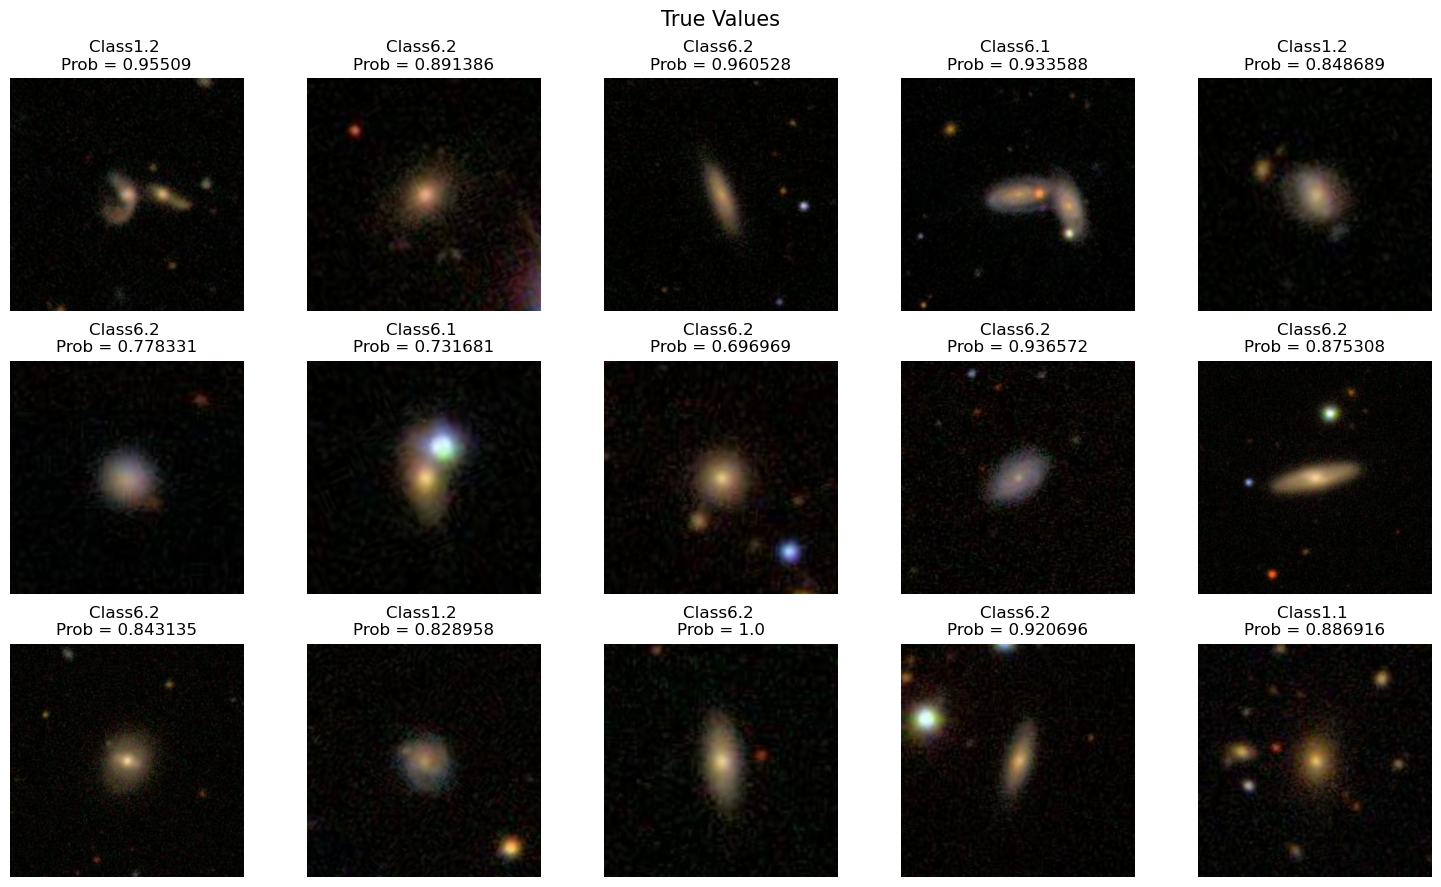

In [41]:
def plot_random_galaxies(df, image_dir, num_images=15, random_state=random_state, true_values=True):
    '''Function to display test and train images of the Galaxies along side the highest prob class, and its assocaited prob.
    
    Also prints out image size.'''
    # Select a random sample of galaxies
    sample_galaxies = df.sample(n=num_images, random_state=random_state)
    
    # Setup the matplotlib figure and axes
    fig, axs = plt.subplots(3, 5, figsize=(15, 9))  # Adjusted for 15 images (3 rows by 5 columns)
    axs = axs.ravel()  # Flatten the array of axes for easier indexing
    
    print_first = False
    for idx, (i, row) in enumerate(sample_galaxies.iterrows()):
        # Assuming there's a column 'GalaxyID' that corresponds to the image file name
        image_file = os.path.join(image_dir, f"{int(row['GalaxyID'])}.jpg")
        
        # Read the image file
        image = plt.imread(image_file)

        if print_first == False: # print out shape of image for the first image
            print('Image size is')
            print(np.shape(image))
            print_first = True
        
        # Find the column with the maximum value, excluding 'GalaxyID'
        label_col = row.drop('GalaxyID').idxmax()
        label_value = row[label_col] 
        
        # Prepare the label text with the column name and its value
        label_text = f"{label_col}: {label_value:.2f}"  # Format to 2 decimal places

        label_text = str(label_col) + ' ' + '\nProb = ' + str(label_value) 
        
        # Plot the image
        axs[idx].imshow(image)
        axs[idx].set_title(label_text)
        axs[idx].axis('off')  # Turn off axis
        
    if true_values:
        plt.suptitle("True Values", fontsize=15)
    else:
        plt.suptitle('Predicted values', fontsize=15)
    plt.tight_layout()
    plt.show()


def plot_images_with_labels(images, true_labels, predicted_labels, true_probs, predicted_probs):
    """
    Plots a 3x5 grid of images with true and predicted labels and their probabilities.
    Images with correct predictions are titled in green, and incorrect ones in red.
    """
    
    # Create a 3x5 plot
    fig, axes = plt.subplots(3, 5, figsize=(15, 9))
    axes = axes.ravel()

    for idx, (image, true_label, predicted_label, true_prob, predicted_prob) in enumerate(zip(images, true_labels, predicted_labels, true_probs, predicted_probs)):
        axes[idx].imshow(image.permute(1, 2, 0))  # Assuming the image is in CxHxW format
        title_color = 'green' if true_label == predicted_label else 'red'
        axes[idx].set_title(f'True: {true_label} ({true_prob:.2f})\nPred: {predicted_label} ({predicted_prob:.2f})', color=title_color)
        axes[idx].set_xticks([])
        axes[idx].set_yticks([])

    plt.tight_layout()
    plt.show()


plot_random_galaxies(df, image_dir)

### Pre-processing and model defintion

In [12]:
# Data pre-processing

class GalaxyDataset(Dataset):
    '''Performs the data preproccesing 

    Gets data, and images into the write type to be easily parced by Pytorch. 

    Data image goes with the values from the classes 

    Use like:

    # Create the dataset instances
    train_dataset = GalaxyDataset(dataframe=df_train, image_dir=image_dir)
    test_dataset = GalaxyDataset(dataframe=df_test, image_dir=image_dir)

    # use with DataLoader to create batches
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    # Assuming you have a dictionary that maps column names to indices
    # For example: label_to_index = {'class1': 0, 'class2': 1, ..., 'classN': N-1}
    # You should define this dictionary based on your dataframe's column names
    #label_to_index = {col: idx for idx, col in enumerate(dataframe.columns[1:])}
    '''
    def __init__(self, dataframe, image_dir, transform=None):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform or Compose([
            Resize((200, 200)),  
                                # force to be 200x 200
            ToTensor()  # Convert image to tensor
        ])

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, f"{int(self.dataframe.iloc[idx, 0])}.jpg")
        image = Image.open(img_name)

        if self.transform:
            image = self.transform(image)

        # Get all the class values instead of the label for the highest probability class
        class_values = self.dataframe.iloc[idx, 1:].values  # Exclude 'GalaxyID'
        class_values = torch.tensor(class_values, dtype=torch.float32)

        return image, class_values

# Create the dataset instances
train_dataset = GalaxyDataset(dataframe=df_train, image_dir=image_dir)
test_dataset = GalaxyDataset(dataframe=df_test, image_dir=image_dir)

# use with DataLoader to create batches
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [13]:
class Net(nn.Module):
    '''
    class Net(nn.Module):
    
    A convolutional neural network (CNN) module for image classification.

    The network consists of three convolutional layers with ReLU activations, followed by
    max pooling. After the convolutional layers, there are three fully connected layers
    that culminate in an output layer with a number of outputs corresponding to the
    number of classes.

    The network expects input images of size 200x200 with 3 color channels (RGB).

    Parameters:
    num_classes (int): The number of classes for the output layer of the network.

    Attributes:
    conv1 (nn.Conv2d): First convolutional layer with 20 output channels and a kernel size of 5.
    pool (nn.MaxPool2d): Max pooling layer with a 2x2 window and stride of 2.
    conv2 (nn.Conv2d): Second convolutional layer with 20 output channels and a kernel size of 5.
    conv3 (nn.Conv2d): Third convolutional layer with 20 output channels and a kernel size of 5.
    fc1 (nn.Linear): First fully connected layer with 50 output features.
    fc2 (nn.Linear): Second fully connected layer with 50 output features.
    fc3 (nn.Linear): Third fully connected layer with `num_classes` output features for classification.

    Methods:
    forward(x): Defines the forward pass of the network with an input batch of images `x`.
    num_flat_features(x): Computes the number of features to be flattened before passing to the first fully connected layer.

    '''
    
    def __init__(self, num_classes=37):
        super(Net, self).__init__()

        # input image size = 200x200
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 20, kernel_size=5, padding=2)  # Padding adjusted to keep the spatial dimensions
        # Max pooling layer with 2x2 kernel
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(20, 20, kernel_size=5, padding=2)
        self.conv3 = nn.Conv2d(20, 20, kernel_size=5, padding=2)
        #self.conv4 = nn.Conv2d(20, 20, kernel_size=5, padding=2)
       
        # Fully connected layers
        # After three pooling layers, the feature map size will be 200 / 2 / 2 / 2 = 25
        self.fc1 = nn.Linear(20 * 25 * 25, 50)  # Size will be adjusted after calculating the flattened size
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, num_classes)

    def forward(self, x):
        # Apply first convolutional layer with ReLU activation function and pooling
        x = self.pool(F.relu(self.conv1(x)))
        # Apply second convolutional layer with ReLU activation function and pooling
        x = self.pool(F.relu(self.conv2(x)))
        # Apply third convolutional layer with ReLU activation function
        x = self.pool(F.relu(self.conv3(x)))
        # Flatten the tensor to prepare it for the dense layer
        x = x.view(-1, self.num_flat_features(x))
        # Apply first dense layer with ReLU activation function
        x = F.relu(self.fc1(x))
        # Apply second dense layer with ReLU activation function
        x = F.relu(self.fc2(x))
        # Apply output dense layer without softmax activation for classification
        x = self.fc3(x)  # Output raw logits
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # Exclude the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

# Create an instance of the Net
net = Net(num_classes=num_classes)

### Training loop below

In [14]:
# Set the device to 'cuda' if a GPU is available, else 'cpu'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Running on ', device)

# Transfer the model to the device
net.to(device)

# Load the previously saved model parameters if they exist
# This lets us train for more epochs! 
try:
    net.load_state_dict(torch.load(model_path, map_location=device))
    print(f"Model loaded from {model_path}")
except FileNotFoundError:
    print(f"No saved model found at {model_path}, starting training from scratch.")

# Set the number of threads for PyTorch operations
torch.set_num_threads(multiprocessing.cpu_count() -2)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=lr)

# Transfer the model to the device
net.to(device)

loss_history = []


for epoch in range(num_epochs):
    running_loss = 0.0
    net.train()  # Set the model to training mode
    for i, data in enumerate(train_loader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            loss_history.append(running_loss/100)
            running_loss = 0.0

    # Save the model parameters after each epoch 
    torch.save(net.state_dict(), f'model_epoch_{epoch+1}.pth')

    # Validation phase
    net.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            
            outputs = net(images) # run model 

            probabilities = F.softmax(outputs, dim=1)  # Apply softmax to convert logits to probabilities

            # Using torch.max, we compare the indices of the maximum values
            # Since the labels are given as one-hot vectors.
            _, predicted_indices = torch.max(probabilities, 1) # the _ would be the actual prob value
            _, true_indices = torch.max(labels, 1)
            
            total += labels.size(0)
            correct += (predicted_indices == true_indices).sum().item()

    print(f'Epoch {epoch + 1} completed. Validation Accuracy: {100 * correct / total:.2f}%')
    
torch.save(net.state_dict(), 'final_model_v2.pth') # saves final model parameters 
print('Finished Training')

Running on  cpu
No saved model found at final_model_v5.pth, starting training from scratch.
Epoch 1, Batch 100, Loss: 15.5850
Epoch 1, Batch 200, Loss: 15.1640
Epoch 1, Batch 300, Loss: 14.9564
Epoch 1, Batch 400, Loss: 14.8724
Epoch 1, Batch 500, Loss: 14.6762
Epoch 1, Batch 600, Loss: 14.6452
Epoch 1, Batch 700, Loss: 14.6370
Epoch 1, Batch 800, Loss: 14.4779
Epoch 1 completed. Validation Accuracy: 49.77%
Epoch 2, Batch 100, Loss: 14.4678
Epoch 2, Batch 200, Loss: 14.4070
Epoch 2, Batch 300, Loss: 14.4580
Epoch 2, Batch 400, Loss: 14.4103
Epoch 2, Batch 500, Loss: 14.3095
Epoch 2, Batch 600, Loss: 14.3793
Epoch 2, Batch 700, Loss: 14.3167
Epoch 2, Batch 800, Loss: 14.2446
Epoch 2 completed. Validation Accuracy: 56.22%
Epoch 3, Batch 100, Loss: 14.2555
Epoch 3, Batch 200, Loss: 14.2880
Epoch 3, Batch 300, Loss: 14.2844
Epoch 3, Batch 400, Loss: 14.1452
Epoch 3, Batch 500, Loss: 14.1805
Epoch 3, Batch 600, Loss: 14.0813
Epoch 3, Batch 700, Loss: 14.2671
Epoch 3, Batch 800, Loss: 14.147

### Results

Running on  cpu
Model loaded from final_model_v2_trained_20_epochs.pth


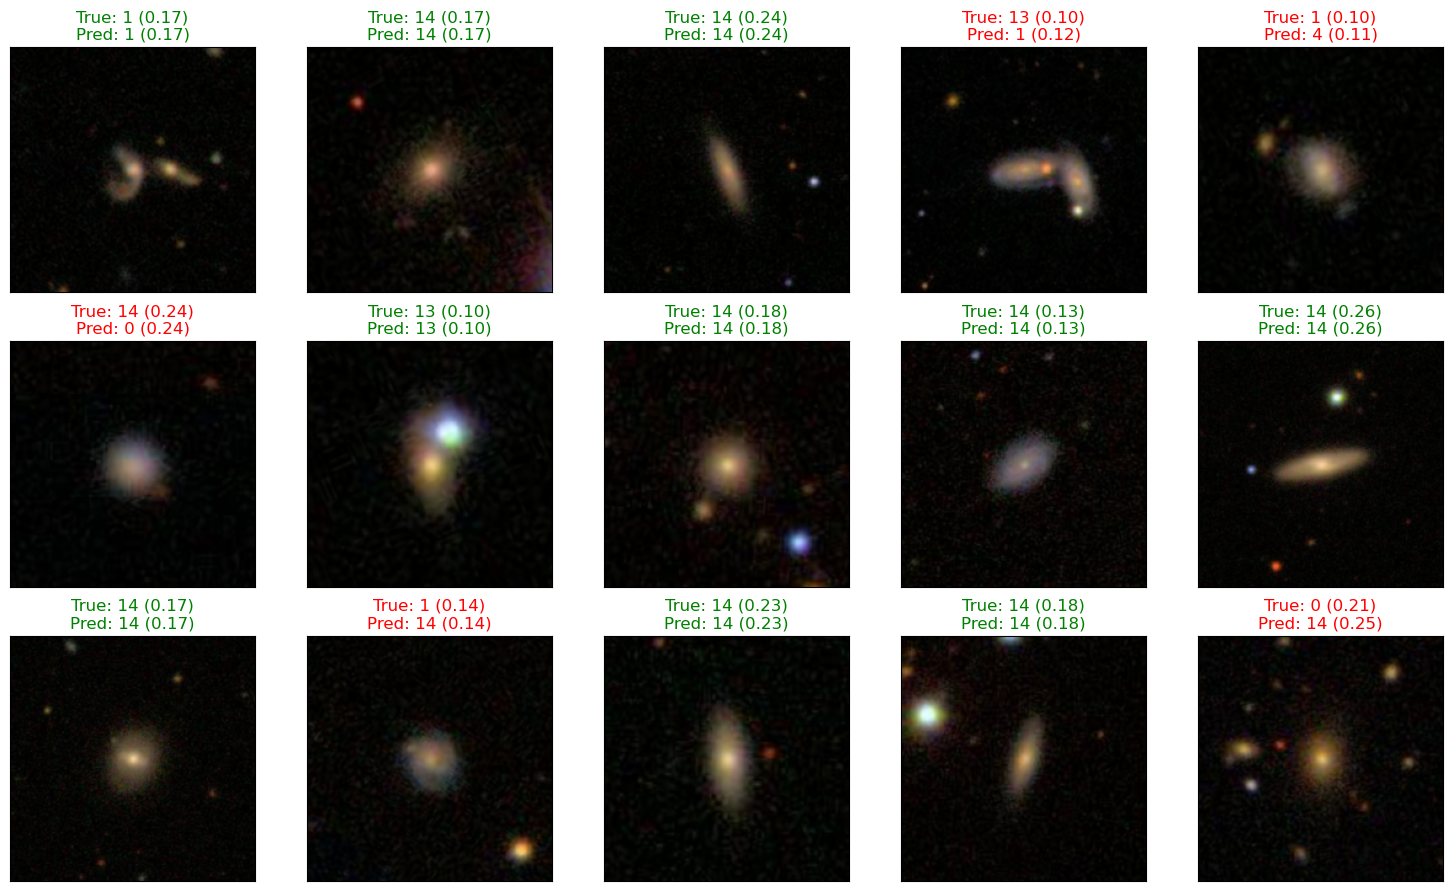

Training completed. Validation Accuracy: 65.78%
Precision: 0.7032
Recall: 0.6578
F1 Score: 0.6681


/home/afinemax/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


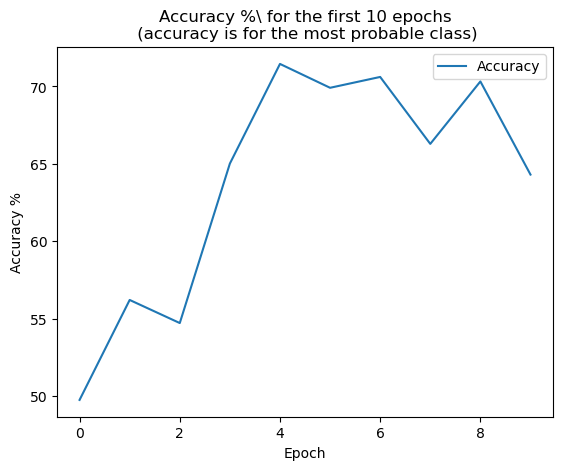

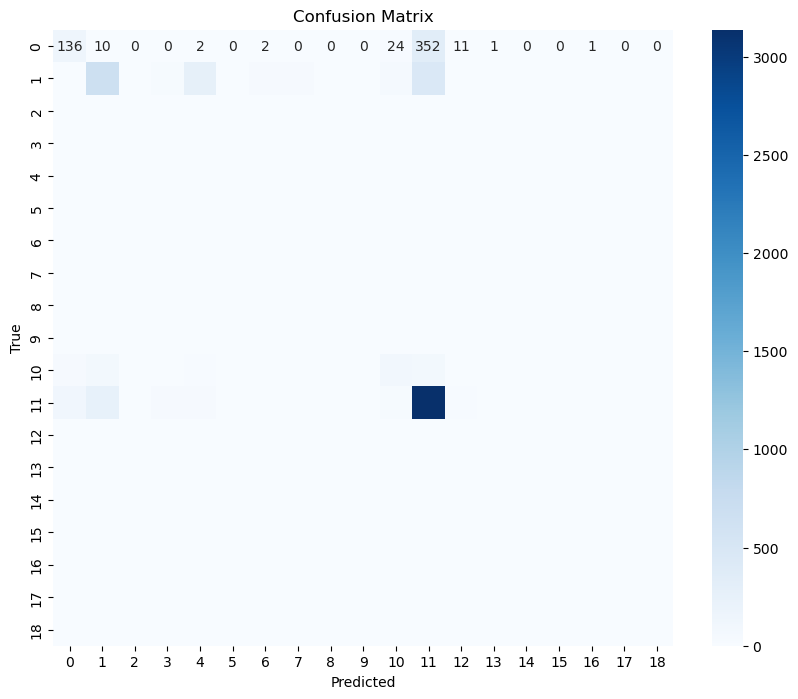

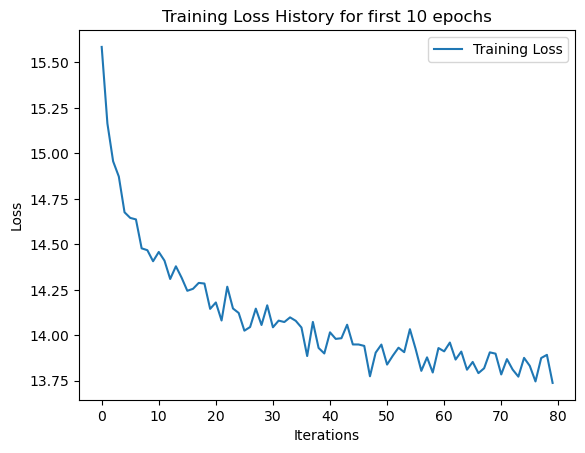

In [89]:
# load in resulting model ( I trained it for longer then the cell above inplies for a total of 30 epochs)

# Set the device to 'cuda' if a GPU is available, else 'cpu'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Running on ', device)

# Transfer the model to the device
net.to(device)

# Load the previously saved model parameters if they exist
# This lets us train for more epochs! 
try:
    net.load_state_dict(torch.load(model_path, map_location=device))
    print(f"Model loaded from {model_path}")
except FileNotFoundError:
    print(f"No saved model found at {model_path}, starting training from scratch.")


# Validation phase
net.eval()  # Set the model to evaluation mode
correct = 0
total = 0
# Lists to store true and predicted labels
true_labels_list = []
predictions_list = []

sum_true_class_probs = torch.zeros(num_classes, device=device)
sum_predicted_class_probs = torch.zeros(num_classes, device=device)

plot_predict = False
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
            
        outputs = net(images) # run model 

        probabilities = F.softmax(outputs, dim=1)  # Apply softmax to convert logits to probabilities

        # Using torch.max, we compare the indices of the maximum values
        # Since the labels are given as one-hot vectors.
        _, predicted_indices = torch.max(probabilities, 1) # the _ would be the actual prob value
        _, true_indices = torch.max(labels, 1)
            
        total += labels.size(0)
        correct += (predicted_indices == true_indices).sum().item()

        # Add the true and predicted labels to the respective lists
        true_labels_list.extend(true_indices.cpu().numpy())
        predictions_list.extend(predicted_indices.cpu().numpy())

        # Sum the probabilities for the true classes
        sum_true_class_probs += probabilities[torch.arange(labels.size(0)), true_indices].sum(dim=0)

        # Sum the probabilities for the predicted classes
        sum_predicted_class_probs += probabilities[torch.arange(labels.size(0)), predicted_indices].sum(dim=0)


        predicted_probs = torch.gather(probabilities, 1, predicted_indices.view(-1, 1)).squeeze()
        true_probs = torch.gather(probabilities, 1, true_indices.view(-1, 1)).squeeze()

        # Get the first 15 images, true labels, predictions, and their respective probabilities
        images = images[:15]
        true_labels = true_indices[:15]
        predicted_labels = predicted_indices[:15]
        true_label_probs = true_probs[:15]
        predicted_label_probs = predicted_probs[:15]

        # Now call the function to plot the images
        

        if plot_predict == False:
            plot_images_with_labels(images, true_labels, predicted_labels, true_label_probs, predicted_label_probs)
            plot_predict = True

    print(f'Training completed. Validation Accuracy: {100 * correct / total:.2f}%')


# Assuming true_labels_list and predictions_list contain the true and predicted labels for the test set
precision = precision_score(true_labels_list, predictions_list, average='weighted')  
recall = recall_score(true_labels_list, predictions_list, average='weighted')
f1 = f1_score(true_labels_list, predictions_list, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


###############################
'This part is new'
###############################
# Calculate the confusion matrix

Accuracy = [49.77, 56.22 , 54.73, 65.02, 71.45, 69.91, 70.61, 66.29, 70.32, 64.31] # copied by hand from the output cell
plt.plot(Accuracy, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy %')
plt.title('Accuracy %\ for the first 10 epochs\n (accuracy is for the most probable class)')
plt.legend()
plt.show()


cm = confusion_matrix(true_labels_list, predictions_list)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot the loss history
plt.plot(loss_history, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss History for first 10 epochs')
plt.legend()
plt.show()




### Results:

Validation Accuracy (65.78%): This means that the model correctly predicted the class for about 65.78% of the samples in the validation set. For a multi-class classification problem with 37 classes, an accuracy of 65.78% could be considered reasonably good, depending on the complexity of the task and the distribution of the classes. It's important to compare this accuracy with a relevant baseline, such as the accuracy of a trivial classifier or other models trained on the same task.

Precision (0.7032): With a precision of 0.7032, when the model predicts a class, it is correct approximately 70.32% of the time. This is a substantial improvement over the earlier reported precision and suggests that the model has a reasonable ability to correctly identify positive examples for each class, with a moderate number of false positives.

Recall (0.6578): A recall of 0.6578 indicates that the model correctly identifies about 65.78% of all actual positive cases across all classes. This means that the model is relatively good at finding the true positives, but there are still some true positives that the model fails to detect (false negatives).

F1 Score (0.6681): The F1 score is the harmonic mean of precision and recall. An F1 score of 0.6681 is relatively close to the precision and recall values, indicating a balance between the two. This suggests that the model has a fairly consistent performance in terms of both precision and recall.


Feel free to look at the plots yourself or read about them in the Discussion section





### Discussion

The model appears to work, but is less accurate at ~65% then I would like. Several of the training epochs had an accuracy of ~70%. This indicates that the learning rate may be too high and we are starting to osccilate around the min loss instead of apporaching it. We can see this again in the Loss vs iterations plot for the first 10 epochs we can see that at iteration 80ish the up and down noise of each iteration is greater then the descent. 

Given our Precision, and recall scores - I think the model works consitantly which is good! 

Our confusion matrix is a bit strange, it should be 37x37 but is instead 18x18. I do not know what happened to the missing classes, or how this happened. This is a cause for conern. Similary, I would have plotted some posteriors for the images if I knew. 

Looking at the images of several predicted vs true classes (in the pytorch labels), it appears the model does worse on the less certain galaxies as identified by the Human volunteers (prob ~0.25 ish). I think this is kinda reasonable, perhaps it would have been wize to account for the case of "ties" by the humans if there were any or "ties" predicted by the model. I am not certain how those are handled at the moment. 


Suggested Improvments:

If I had more time (aka I will be running this after the class), I would increase the convolution channel outputs, at present the model has 3 laywers and each with 20 output channels. This worked well for MINST where their were only 10 classes, but with 37 classes maybe it is wizer to go for 2x37 channel outputs? If this is now too computationally expensive, toss in another max pooling layer (this would require slightly adjusting the pre-processing to a number that can be divided by 16 evenly). 

After the first 10 epochs of training, I would like to adjust the learing rate to be smaller, maybe by half? and then half again after another 10 epochs of training. I think would mitigate the bouncing / oscilating behavor of the loss vs iteration plot and improve the results. 

Rereading the given classes, there appear to be subclasses / related classes. I am not sure how to encourage the ML model to understand this. With one-Hot encoding each class is treated as unrelated, perhaps the relations are well identified by the training routine anyway. 


Relation to Astronomy Task / further science research:

Perhaps the reason the confusion matrix is 18x18, is because there are only 18 unique classes and not 37! The ML model is aggregating the non-unique classes. We reconmend futher study on this issue, likely somewhere we messed up in our analysis. 

We reconmend making a plot of the different galaxy classes (in terms of prob distrubution) vs redshift*. This would let us see galaxy evolution, and identify how the classes are related. 

* for non astro ppl, redshift can be thought of as how old (in time) the galaxy are, higher redshift = we are looking at younger galaxies. 



### Conclusion
The evaluation of the machine learning model for the multi-class galaxy classification task has yielded mixed results. With a validation accuracy of 65.78%, the model has demonstrated a reasonable capability to correctly identify galaxy classes as compared to a 37-class random baseline. However, it falls short of the state-of-the-art performance, which hovers around 75% accuracy based on the Kaggle leaderboard for similar tasks.

The precision score of 0.7032 indicates that the model is relatively reliable when it asserts a galaxy belongs to a specific class, with a 70.32% chance of being correct. The recall score of 0.6578, while lower, suggests that the model can correctly retrieve a majority of positive instances for each class. Together, these metrics are synthesized into an F1 score of 0.6681, reflecting a balance between precision and recall and implying consistent performance across the classes.

The discrepancy between the expected 37x37 confusion matrix and the observed 18x18 matrix raises concerns about potential issues in class representation or data processing. The cause of the missing classes in the confusion matrix needs to be investigated to ensure that all classes are being evaluated correctly.

The model's performance on images labeled with lower confidence by human volunteers suggests that it struggles with ambiguity in the data, which is expected given the subjective nature of visual classification. The approach to ties in the data, both from human labeling and model predictions, may require further refinement to improve classification accuracy.

Suggested improvements include increasing the model's complexity to better capture the distinctions between the 37 classes, fine-tuning the learning rate to address oscillations in loss observed during training, and exploring methods to encode the relationships between subclasses to provide the model with more context.

In the broader context of astronomy, the potential misclassification of galaxy types and the possibility that the model is merging non-unique classes could significantly impact the study of galaxy evolution. Further research is recommended to clarify these classification issues. Additionally, correlating galaxy classification with redshift data could provide valuable insights into the evolution of galaxies over time.

Overall, the machine learning approach to galaxy classification shows promise but requires further development and refinement to reach its full potential. With continued effort, it has the potential to significantly aid astronomers in the time-consuming task of galaxy categorization, freeing up resources for the advancement of our understanding of the universe..

### Usage of AI:

In used AI heavily to help code, and debug all parts of the code. Very much programing like star trek! I had to rewrite the model part myself because it wanted to use different values for each layer. It was very helpfull with the pre-proccesing cell which was all AI. 


I used AI to write the conclusion, and used it to edit the introduction, and data sections. 